In [1]:
"""
Created on Tue Apr  8 09:12:40 2025

@author: ddm
"""

'\nCreated on Tue Apr  8 09:12:40 2025\n\n@author: ddm\n'

In [2]:
import sys
sys.path.append("../Librerie") 
import numpy as np # importa Numpy
import matplotlib.pyplot as plt # importa Matplotlib
import scipy.ndimage as ndi # importa Scipy per le immagini
import skimage.io as io # importa il modulo Input/Output di SK-Image
import scipy.ndimage as ndi
import mylib as ml

1. Filtraggio notch. L’immagine anelli.tif mostra una parte degli anelli che circondano Saturno. Il rumore
sinusoidale `e dovuto ad un segnale AC sovrapposto a quello della fotocamera prima di digitalizzare l’immagine.
Tale interferenza `e semplice da rimuovere se si progetta un filtro notch in grado di cancellare il
contributo del rumore. Calcolate quindi la trasformata di Fourier dell’immagine, analizzatela, individuate
il contributo realtivo al segnale sinusoidale e cercate di eliminarlo con il filtraggio

Text(0.5, 1.0, 'Immagine input')

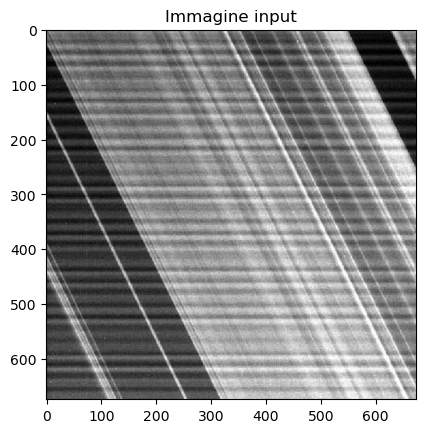

In [3]:
#Visualizzo Immagine input
x = io.imread('../immagini/anelli.tif')
plt.figure(1)
plt.imshow(x,clim=None,cmap='gray')
plt.title('Immagine input')

Text(0.5, 1.0, 'Spettro delle ampiezze')

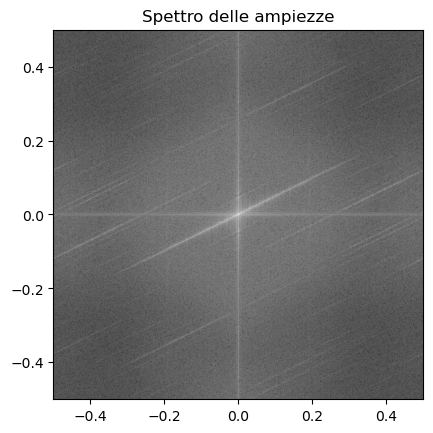

In [4]:
#Visualizzo spettro ampiezze
X = np.fft.fft2(x)
X = np.fft.fftshift(X)
plt.figure(2)
plt.imshow( np.log(1+np.abs(X)),clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Spettro delle ampiezze')
#Notiamo che il contributo del rumore si traduce in frequenza in una croce

In [5]:
#Proviamo allora a rimuovere questo contributo (senza intaccare le basse frequenze)
m = np.fft.fftshift( np.fft.fftfreq(X.shape[0]))
n = np.fft.fftshift( np.fft.fftfreq(X.shape[1]))
l,k = np.meshgrid(n,m)#l com.orizzontale , k comp verticale

Text(0.5, 1.0, 'Risp. in frequenza della riga')

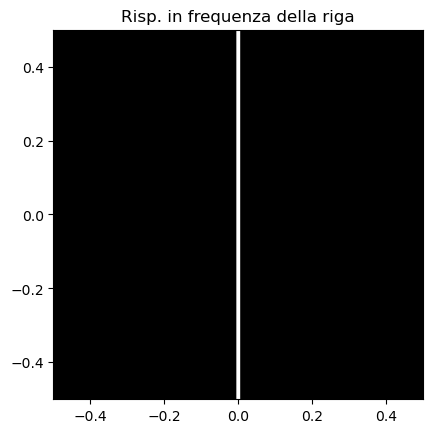

In [6]:
eps= 0.005
r= 0.03
#Creo riga
cross = (( (l < eps)&(l > -eps)))
plt.figure(3)
plt.imshow( cross,clim=[0,1],cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risp. in frequenza della riga')

Text(0.5, 1.0, 'Risp. in frequenza del cerchio')

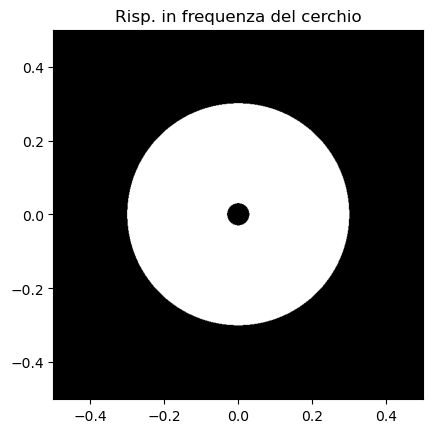

In [7]:
#Creo cerchio (LPF)
notch =( np.sqrt( l**2 + k**2 ) > r) & (np.sqrt( l**2 + k**2 ) < r*10 )
plt.figure(4)
plt.imshow( notch,clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risp. in frequenza del cerchio')

Text(0.5, 1.0, 'Risp. in frequenza dela maschera')

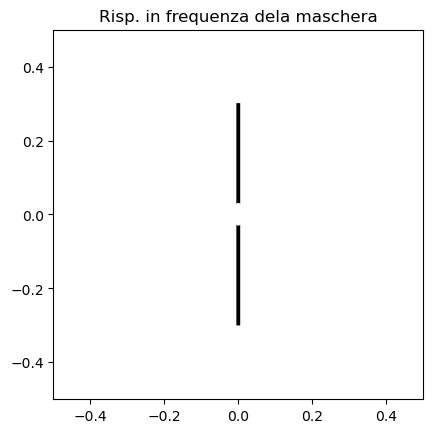

In [8]:
#Combino le due maschere
mask =1 - ( notch * cross )
plt.figure(5)
plt.imshow( mask,clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risp. in frequenza dela maschera')

Text(0.5, 1.0, 'Risultato del filtraggio in frequenza')

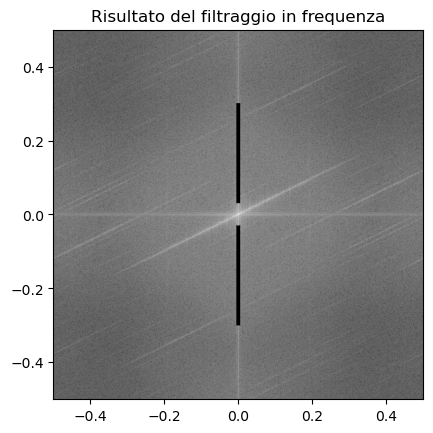

In [9]:
#Applico filtraggio
Y = X  * mask
plt.figure(6)
plt.imshow( np.log( 1+ np.abs(Y)),clim=None,cmap='gray',extent=(-0.5,+0.5,-0.5,+0.5))
plt.title('Risultato del filtraggio in frequenza')

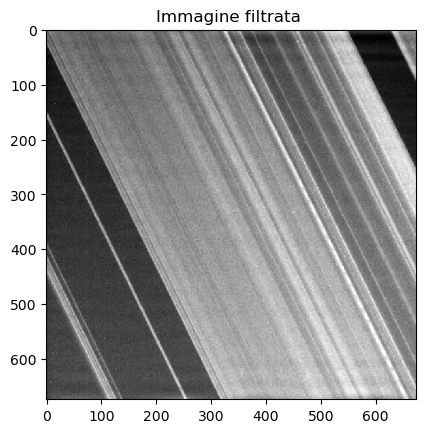

In [10]:
#Verifico filtraggio nel dominio dello spazio
y = np.real(np.fft.ifft2( np.fft.ifftshift( Y ) ));
plt.figure(7); plt.imshow(y, clim=[0,255], cmap='gray');
plt.title('Immagine filtrata ');